In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.patches import Rectangle

import os

In [6]:
gitpath_idx = os.getcwd().find('GitHub')+len('GitHub')
local_github_path = os.getcwd()[:gitpath_idx]
local_github_path 

'c:\\Users\\ratta\\Documents\\GitHub'

In [9]:
filepath = local_github_path+r"\Pyleoclim_util\gts_test_RR\spreadsheet"
filename = "pyrolite_updated_ICC2022.xlsx"
gts = pd.read_excel(os.path.join(filepath,filename))

for i in range(len(gts.Color)):
    temp_values= gts.loc[i,('Color')].replace('(',',').replace(')',',')   
    gts.Color.loc[i] = tuple(map(float,temp_values.split(',')[1:5]))
    
gts.head()

C:\Users\ratta\AppData\Local\Temp\ipykernel_16900\2614977553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gts.Color.loc[i] = tuple(map(float,temp_values.split(',')[1:5]))


,Ident,Name,Level,Start,End,MeanAge,Unc,Eon,Era,Period,Superepoch,Epoch,Age,Aliases,Color,Remark
0,Phanerozoic,Phanerozoic,Eon,538.8000,0.0,269.40000,269.40000,Phanerozoic,NaN,NaN,NaN,NaN,NaN,"['phanerozoic', 'phanerozoic']","(0.6039215686274509, 0.8509803921568627, 0.866...",Start age changed from ICS2013
1,Phanerozoic-Cenozoic,Cenozoic,Era,66.0000,0.0,33.00000,33.00000,Phanerozoic,Cenozoic,NaN,NaN,NaN,NaN,"['cenozoic', 'phanerozoic-cenozoic']","(0.9490196078431372, 0.9764705882352941, 0.113...",not changed
2,Phanerozoic-Cenozoic-Quaternary,Quaternary,Period,2.5800,0.0,1.29000,1.29000,Phanerozoic,Cenozoic,Quaternary,NaN,NaN,NaN,"['quaternary', 'phanerozoic-cenozoic-quaternar...","(0.9764705882352941, 0.9764705882352941, 0.498...",not changed
3,Phanerozoic-Cenozoic-Quaternary-Holocene,Holocene,Epoch,0.0117,0.0,0.00585,0.00585,Phanerozoic,Cenozoic,Quaternary,NaN,Holocene,NaN,"['holocene', 'phanerozoic-cenozoic-quaternary-...","(0.996078431372549, 0.9490196078431372, 0.9254...",not changed
4,Phanerozoic-Cenozoic-Quaternary-Holocene-Megha...,Meghalayan,Age,0.0042,0.0,0.00210,0.00210,Phanerozoic,Cenozoic,Quaternary,NaN,Holocene,Meghalayan,"['meghalayan', 'phanerozoic-cenozoic-quaternar...","(0.996078431372549, 0.9490196078431372, 0.9254...",not changed


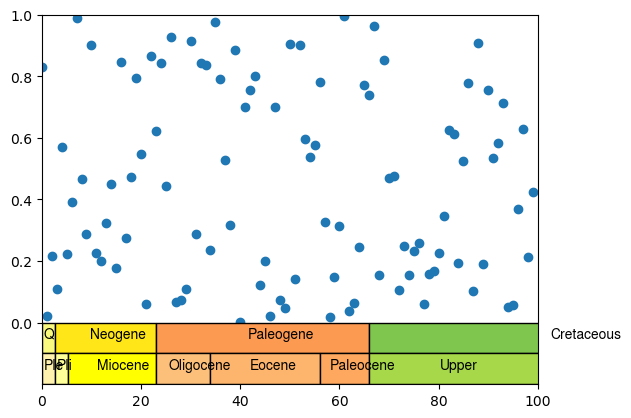

In [14]:
fig, ax = plt.subplots()

x = np.arange(0,100,1)
y = np.random.rand(len(x))

ax.scatter(x,y)

ldf = gts.loc[gts.Level == "Period", :].reset_index()

dataMaxAge = x.max()

#find the oldest numeric age of the geologic time scale to plot based on sample ages
match_oldestPlotAge =  min(i for i in ldf.End if i > dataMaxAge)

#find the idx of the oldest geologic period to plot on the graph
match_idxPlotAge = abs(ldf.End-match_oldestPlotAge).idxmin()

#create variables for plotting
ageName = ldf.Name
ageStart = ldf.Start
ageEnd = ldf.End
ageMean = ldf.MeanAge
ageColor = ldf.Color

y_axis_height = math.ceil(y.max()) - math.floor(y.min())
ymin_ax = math.floor(y.min())
ymax_ax = math.ceil(y.max())
bottom_GTS_box = ymin_ax-(y_axis_height*0.2) ### In this example, extend the bottom of y-axis by 20% of the y value ranges
ax.set_ylim([bottom_GTS_box,ymax_ax]) ## Customize your y-axis until your GTS look good!

for i in range(len(ldf.Name[0:match_idxPlotAge])):

    ### determine coordinates for rectangles
    h = bottom_GTS_box/2
    w = ageStart[i] - ageEnd[i]
    # y_gts = math.ceil(y.max()) ### for plotting the GTS at max y value
    y_gts = ymin_ax ### for plotting the GTS at max y value
    x = ageEnd[i]
    xy = (x,y_gts) ### xy coordinate of the top left corner of the box

    rect = Rectangle(xy,w,h,
                    facecolor=ageColor[i],
                    edgecolor="k")
    
    ax.add_artist(rect)

    ### Add texts to GTS boxes --- this need manual adjustment
    if ageName[i] == "Quaternary":
        ax.text(ageMean[i]-1,(y_gts+(h/2)),ageName[i][0],
                fontname='TeX Gyre Heros',
                fontsize=10,
                rotation=0)
    else:        
        ax.text(ageMean[i]-3,(y_gts+(h/2)),ageName[i],
                fontname='TeX Gyre Heros',
                fontsize=10,
                rotation=0)



### This is a repeat of the above with some modifications to add the secondary "Epoch" GTS boxes
ldf_Epoch = gts.loc[gts.Level == "Epoch", :].reset_index()

#find the oldest numeric age of the geologic time scale to plot based on sample ages
match_oldestPlotAge =  min(i for i in ldf_Epoch.End if i > dataMaxAge)

#find the idx of the oldest geologic period to plot on the graph
match_idxPlotAge = abs(ldf_Epoch.End-match_oldestPlotAge).idxmin()

ageName = ldf_Epoch.Epoch
ageStart = ldf_Epoch.Start
ageEnd = ldf_Epoch.End
ageMean = ldf_Epoch.MeanAge
ageColor = ldf_Epoch.Color
eraName = ldf_Epoch.Era

for i in range(len(ldf_Epoch.Epoch[0:match_idxPlotAge])):
    ### determine coordinates for rectangles
    h = bottom_GTS_box/2
    w = ageStart[i] - ageEnd[i]
    y_gts = ymin_ax-(y_axis_height*0.1) ### Start below the primary boxes
    x = ageEnd[i]
    xy = (x,y_gts)  
    rect = Rectangle(xy,w,h,
                    facecolor=ageColor[i],
                    edgecolor="k")
    ax.add_artist(rect)
    if i == 0:
        continue
    elif ((i>0)&(i <= 2)):
        ax.text(ageMean[i]-1,y_gts+(h/2),ageName[i][0:3],
            fontname='TeX Gyre Heros',
            fontsize=10,
            rotation=0)
    else:        
        ax.text(ageMean[i]-3,y_gts+(h/2),ageName[i],
            fontname='TeX Gyre Heros',
            fontsize=10,
            rotation=0)

ax.set_xlim([0,100])
ax.set_yticks(np.arange(0,1.2,0.2))
